In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import *
import matplotlib.pyplot as plt

#Load sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix
from sklearn import linear_model

# Import Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import Perceptron
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
import xgboost

#Learning curve
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import f1_score
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [2]:
df = pd.read_csv('Final Data.csv')
df

,backers_count,country,created_at,deadline,fx_rate,goal,launched_at,spotlight,staff_pick,state_changed_at,class,Score,Comments,Updates
0,45,US,1577743896,1581179226,1.000000,4500.0,1578328026,True,True,1581179226,1,10.47,0.0,9.0
1,21,US,1573666016,1578252537,1.000000,300.0,1575660537,True,False,1578252537,1,14.33,0.0,3.0
2,146,SE,1574880653,1577905200,0.116116,50000.0,1575459486,True,False,1577905200,1,11.18,0.0,0.0
3,31,US,1574060612,1576664821,1.000000,500.0,1574072821,True,False,1576664821,1,15.96,2.0,4.0
4,9,GB,1571141508,1576414740,1.380491,250.0,1573500464,True,False,1576414740,1,12.80,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64713,51,US,1418766416,1425868872,1.000000,5000.0,1423280472,True,False,1425868872,1,13.92,9.0,7.0
64714,11,US,1493913962,1497110947,1.000000,60000.0,1494518947,False,False,1497110948,0,16.24,1.0,0.0
64715,18,US,1427324752,1427677200,1.000000,850.0,1427418491,True,False,1427677215,1,13.46,1.0,4.0
64716,1,GB,1398336316,1401044620,1.406145,10000.0,1398452620,False,False,1401044620,0,13.33,0.0,1.0


In [3]:
df.min()

backers_count                0
country                     AT
created_at          1240456019
deadline            1242467940
fx_rate               0.007728
goal                       1.0
launched_at         1240673781
spotlight                False
staff_pick               False
state_changed_at    1242468025
class                        0
Score                     3.13
Comments                   0.0
Updates                    0.0
dtype: object

In [4]:
from datetime import datetime
  
dt_obj = datetime.fromtimestamp(1240456019)
  
print("date_time:",dt_obj)
print("type of dt:",type(dt_obj))

date_time: 2009-04-23 08:36:59
type of dt: <class 'datetime.datetime'>


US - United States | 
SE - Sweden | 
GB - United Kingdom | 
DK - Denmark | 
AU - Australia | 
CA - Canada | 
FR - France | 
ES - Spain | 
HK - Hongkong | 
NZ - New Zealand | 
SG - Singapore | 
DE - Germany | 
BE - Belgium | 
JP - Japan | 
IT - Italy | 
NL - Netherlands | 
AT - Austria | 
CH - Switzerland | 
MX - Mexico | 
NO - NOrway | 
PL - Poland | 
IE - Ireland | 
LU - Luxembourg | 
GR - Greece | 
SI - Slovenia

In [5]:
var = ['backers_count', 'created_at', 'deadline', 'fx_rate', 'goal', 'launched_at', 'state_changed_at', 'Score', 'Comments', 'Updates']
var

['backers_count',
 'created_at',
 'deadline',
 'fx_rate',
 'goal',
 'launched_at',
 'state_changed_at',
 'Score',
 'Comments',
 'Updates']

<Figure size 432x288 with 0 Axes>

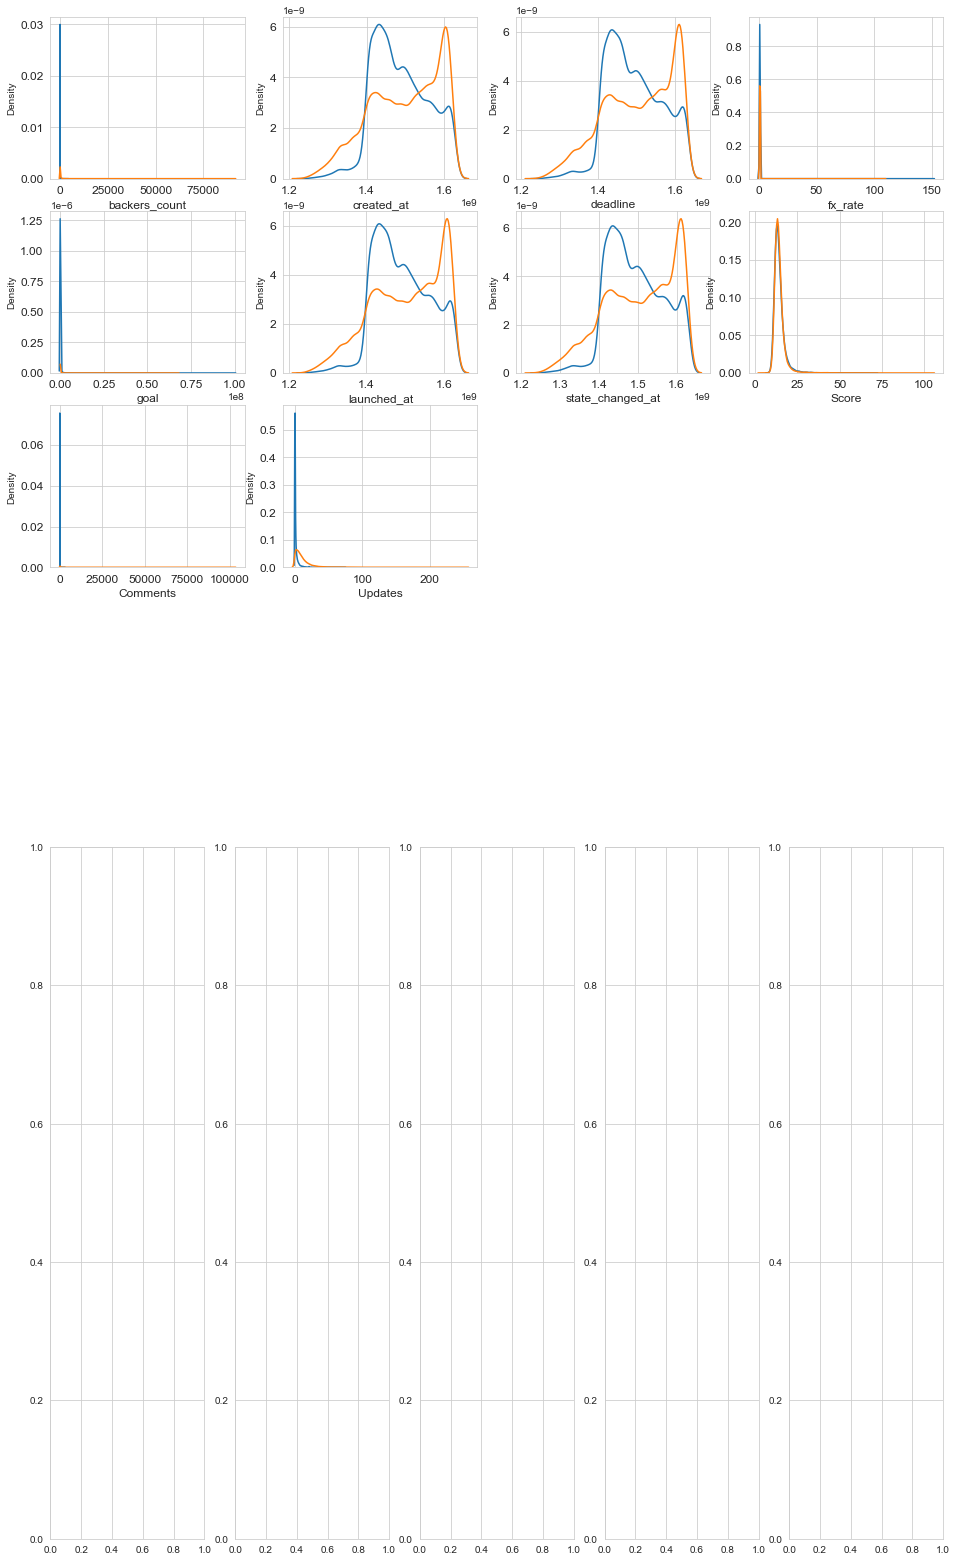

In [6]:

i = 0
t0 = df.loc[df['class'] == 0]
t1 = df.loc[df['class'] == 1]

sns.set_style('whitegrid')
plt.figure()
fig, ax = plt.subplots(2,5,figsize=(16,28))

for feature in var:
    i += 1
    plt.subplot(8,4,i)
    sns.kdeplot(t0[feature],label="class = 0")
    sns.kdeplot(t1[feature],label="class = 1")
    plt.xlabel(feature, fontsize=12)
    locs, labels = plt.xticks()
    plt.tick_params(axis='both', which='major', labelsize=12)
plt.show();

In [7]:
df['class'].value_counts()

1    40123
0    24595
Name: class, dtype: int64

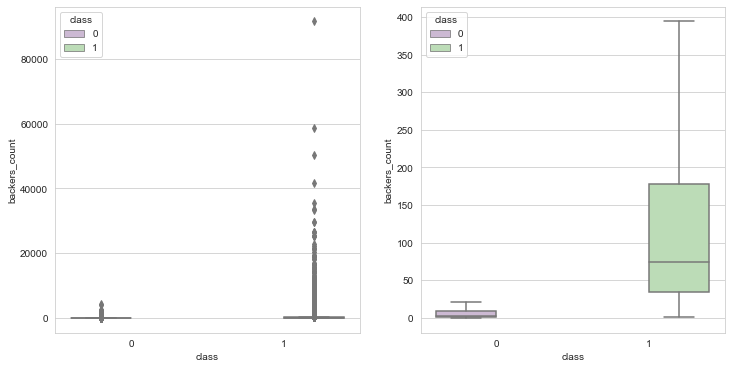

In [8]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
s = sns.boxplot(ax = ax1, x="class", y="backers_count", hue="class",data=df, palette="PRGn",showfliers=True)
s = sns.boxplot(ax = ax2, x="class", y="backers_count", hue="class",data=df, palette="PRGn",showfliers=False)
plt.show();

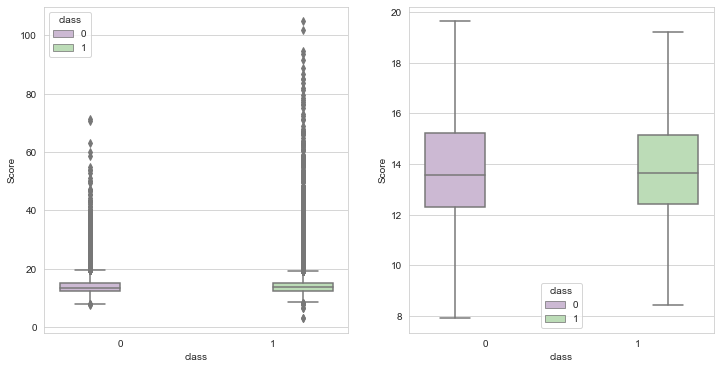

In [9]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
s = sns.boxplot(ax = ax1, x="class", y="Score", hue="class",data=df, palette="PRGn",showfliers=True)
s = sns.boxplot(ax = ax2, x="class", y="Score", hue="class",data=df, palette="PRGn",showfliers=False)
plt.show();

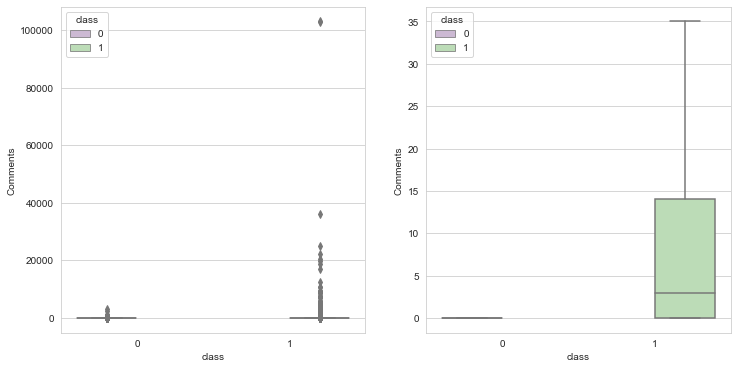

In [10]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
s = sns.boxplot(ax = ax1, x="class", y="Comments", hue="class",data=df, palette="PRGn",showfliers=True)
s = sns.boxplot(ax = ax2, x="class", y="Comments", hue="class",data=df, palette="PRGn",showfliers=False)
plt.show();

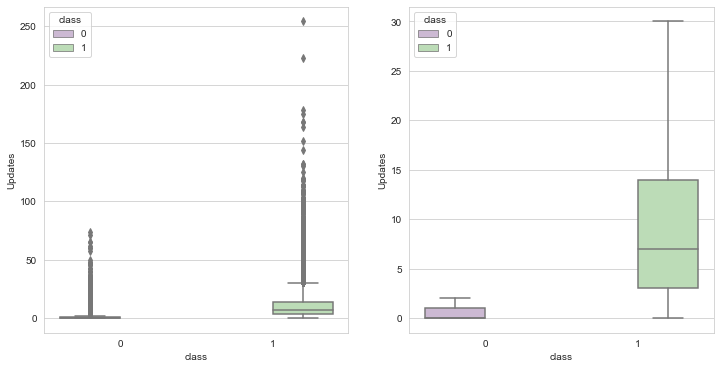

In [11]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
s = sns.boxplot(ax = ax1, x="class", y="Updates", hue="class",data=df, palette="PRGn",showfliers=True)
s = sns.boxplot(ax = ax2, x="class", y="Updates", hue="class",data=df, palette="PRGn",showfliers=False)
plt.show();

array([[<AxesSubplot:title={'center':'backers_count'}>,
        <AxesSubplot:title={'center':'created_at'}>,
        <AxesSubplot:title={'center':'deadline'}>],
       [<AxesSubplot:title={'center':'fx_rate'}>,
        <AxesSubplot:title={'center':'goal'}>,
        <AxesSubplot:title={'center':'launched_at'}>],
       [<AxesSubplot:title={'center':'state_changed_at'}>,
        <AxesSubplot:title={'center':'class'}>,
        <AxesSubplot:title={'center':'Score'}>],
       [<AxesSubplot:title={'center':'Comments'}>,
        <AxesSubplot:title={'center':'Updates'}>, <AxesSubplot:>]],
      dtype=object)

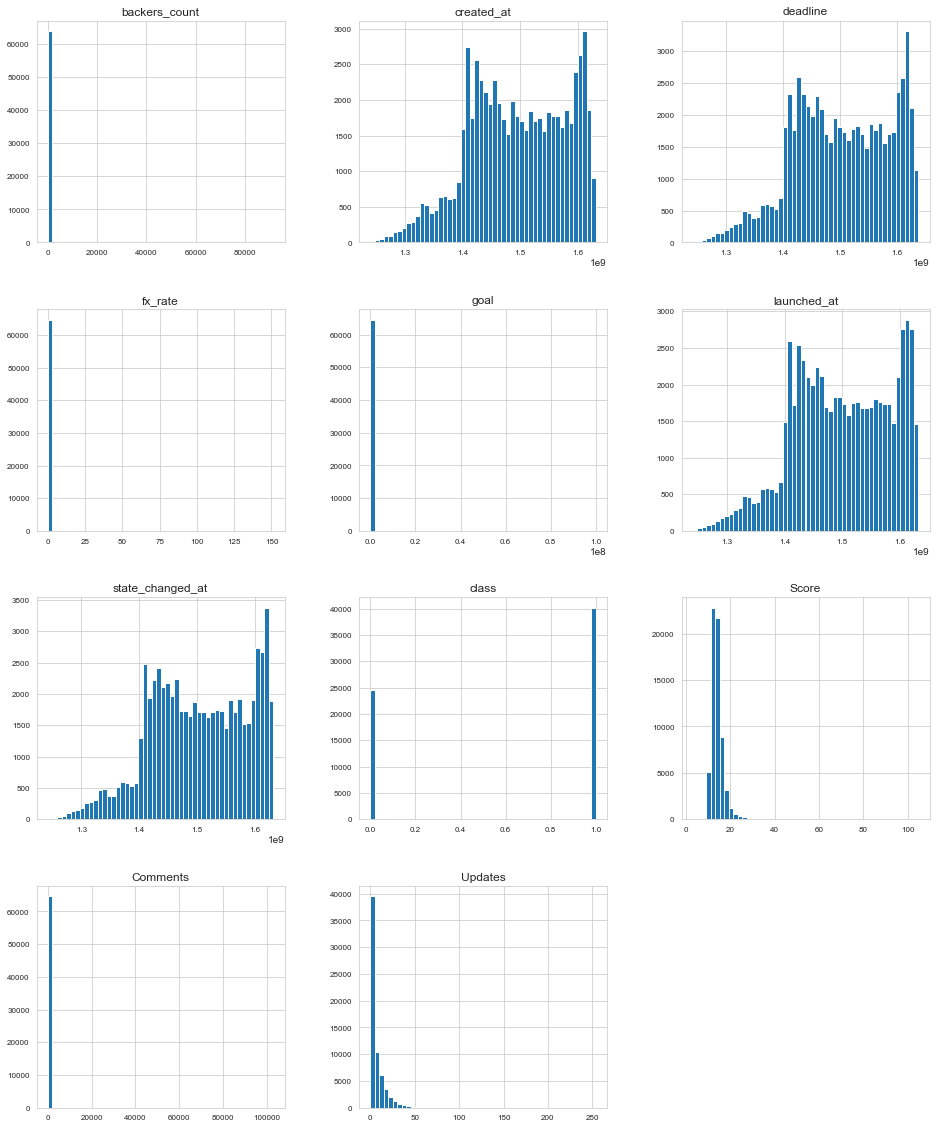

In [12]:
df.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

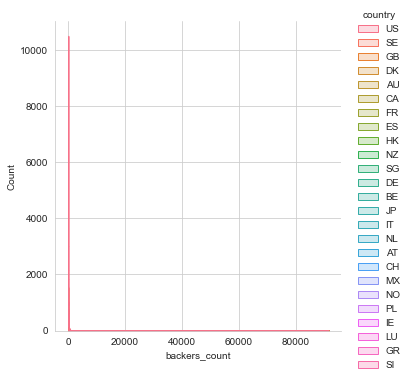

In [13]:
sns.displot(df, x="backers_count", hue="country", element="step")

In [14]:
df['country'].unique()

array(['US', 'SE', 'GB', 'DK', 'AU', 'CA', 'FR', 'ES', 'HK', 'NZ', 'SG',
       'DE', 'BE', 'JP', 'IT', 'NL', 'AT', 'CH', 'MX', 'NO', 'PL', 'IE',
       'LU', 'GR', 'SI'], dtype=object)

In [15]:
df_new = pd.get_dummies(df, columns=['country','spotlight','staff_pick'],drop_first=True)
df_new

,backers_count,created_at,deadline,fx_rate,goal,launched_at,state_changed_at,class,Score,Comments,...,country_NL,country_NO,country_NZ,country_PL,country_SE,country_SG,country_SI,country_US,spotlight_True,staff_pick_True
0,45,1577743896,1581179226,1.000000,4500.0,1578328026,1581179226,1,10.47,0.0,...,0,0,0,0,0,0,0,1,1,1
1,21,1573666016,1578252537,1.000000,300.0,1575660537,1578252537,1,14.33,0.0,...,0,0,0,0,0,0,0,1,1,0
2,146,1574880653,1577905200,0.116116,50000.0,1575459486,1577905200,1,11.18,0.0,...,0,0,0,0,1,0,0,0,1,0
3,31,1574060612,1576664821,1.000000,500.0,1574072821,1576664821,1,15.96,2.0,...,0,0,0,0,0,0,0,1,1,0
4,9,1571141508,1576414740,1.380491,250.0,1573500464,1576414740,1,12.80,1.0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64713,51,1418766416,1425868872,1.000000,5000.0,1423280472,1425868872,1,13.92,9.0,...,0,0,0,0,0,0,0,1,1,0
64714,11,1493913962,1497110947,1.000000,60000.0,1494518947,1497110948,0,16.24,1.0,...,0,0,0,0,0,0,0,1,0,0
64715,18,1427324752,1427677200,1.000000,850.0,1427418491,1427677215,1,13.46,1.0,...,0,0,0,0,0,0,0,1,1,0
64716,1,1398336316,1401044620,1.406145,10000.0,1398452620,1401044620,0,13.33,0.0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
df_input_old = df_new.drop(['class','spotlight_True','backers_count'], axis = 1)
df_ouput = df_new['class']

In [17]:
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler()
df_input = scalar.fit_transform(df_input_old)
df_input = pd.DataFrame(df_input, columns=df_input_old.columns)
df_input = df_input.drop(['state_changed_at'], axis=1)

In [18]:
df_input

,created_at,deadline,fx_rate,goal,launched_at,Score,Comments,Updates,country_AU,country_BE,...,country_MX,country_NL,country_NO,country_NZ,country_PL,country_SE,country_SG,country_SI,country_US,staff_pick_True
0,0.862065,0.858644,0.006558,0.000045,0.863385,0.072280,0.000000,0.035433,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1,0.851642,0.851225,0.006558,0.000003,0.856564,0.110290,0.000000,0.011811,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.854747,0.850345,0.000716,0.000500,0.856050,0.079271,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.852651,0.847200,0.006558,0.000005,0.852504,0.126342,0.000019,0.015748,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.845190,0.846566,0.009072,0.000002,0.851041,0.095224,0.000010,0.007874,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64713,0.455739,0.464927,0.006558,0.000050,0.466927,0.106253,0.000087,0.027559,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
64714,0.647806,0.645529,0.006558,0.000600,0.649084,0.129099,0.000010,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
64715,0.477613,0.469512,0.006558,0.000008,0.477508,0.101723,0.000010,0.015748,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
64716,0.403522,0.401997,0.009242,0.000100,0.403442,0.100443,0.000000,0.003937,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
df_combine = pd.concat([df_input, df_ouput], axis=1)
df_combine

,created_at,deadline,fx_rate,goal,launched_at,Score,Comments,Updates,country_AU,country_BE,...,country_NL,country_NO,country_NZ,country_PL,country_SE,country_SG,country_SI,country_US,staff_pick_True,class
0,0.862065,0.858644,0.006558,0.000045,0.863385,0.072280,0.000000,0.035433,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1
1,0.851642,0.851225,0.006558,0.000003,0.856564,0.110290,0.000000,0.011811,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
2,0.854747,0.850345,0.000716,0.000500,0.856050,0.079271,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1
3,0.852651,0.847200,0.006558,0.000005,0.852504,0.126342,0.000019,0.015748,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
4,0.845190,0.846566,0.009072,0.000002,0.851041,0.095224,0.000010,0.007874,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64713,0.455739,0.464927,0.006558,0.000050,0.466927,0.106253,0.000087,0.027559,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
64714,0.647806,0.645529,0.006558,0.000600,0.649084,0.129099,0.000010,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
64715,0.477613,0.469512,0.006558,0.000008,0.477508,0.101723,0.000010,0.015748,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
64716,0.403522,0.401997,0.009242,0.000100,0.403442,0.100443,0.000000,0.003937,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_input, df_ouput, test_size=0.3,random_state=158)

In [21]:
X_train

,created_at,deadline,fx_rate,goal,launched_at,Score,Comments,Updates,country_AU,country_BE,...,country_MX,country_NL,country_NO,country_NZ,country_PL,country_SE,country_SG,country_SI,country_US,staff_pick_True
52219,0.334976,0.341303,0.006558,0.000020,0.344210,0.065682,0.000408,0.051181,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2331,0.199000,0.197891,0.006558,0.000006,0.199492,0.071984,0.000087,0.003937,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
37670,0.950584,0.945211,0.006558,0.000010,0.954844,0.115608,0.000029,0.027559,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
44479,0.626915,0.623314,0.006558,0.000002,0.627090,0.094042,0.000010,0.015748,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
30625,0.473190,0.471131,0.009242,0.000020,0.473184,0.110881,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18093,0.917760,0.913693,0.004787,0.000020,0.922225,0.106352,0.000000,0.015748,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29454,0.154772,0.161900,0.006558,0.000020,0.154415,0.086263,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
34168,0.928156,0.940575,0.006558,0.000030,0.946695,0.132447,0.000320,0.070866,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
46798,0.432166,0.466854,0.006558,0.002000,0.465557,0.139439,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [22]:
def GridSearchModel(X, Y, model, parameters, cv):
    CV_model = GridSearchCV(estimator = model, param_grid = parameters, cv = cv)
    CV_model.fit(X, Y)
    CV_model.cv_results_
    print("Best Score:", CV_model.best_score_," / Best parameters:", CV_model.best_params_)
    
# Learning curve
def LearningCurve(X, y, model, cv, train_sizes):

    train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv = cv, n_jobs = 4, 
                                                            train_sizes = train_sizes)

    train_scores_mean = np.mean(train_scores, axis = 1)
    train_scores_std  = np.std(train_scores, axis = 1)
    
    train_Error_mean = np.mean(1- train_scores, axis = 1)
    train_Error_std  = np.std(1 - train_scores, axis = 1)
    test_Error_mean  = np.mean(1 - test_scores, axis = 1)
    test_Error_std   = np.std(1 - test_scores, axis = 1)

    Scores_mean = np.mean(train_scores_mean)
    Scores_std = np.mean(train_scores_std)
    
    plt.figure(figsize = (16,4))
    plt.subplot(1,2,1)
    plt.subplot(1,2,2)
    plt.fill_between(train_sizes, train_Error_mean - train_Error_std,train_Error_mean + train_Error_std, alpha = 0.1,
                     color = "r")
    plt.fill_between(train_sizes, test_Error_mean - test_Error_std, test_Error_mean + test_Error_std, alpha = 0.1, color = "g")
    plt.plot(train_sizes, train_Error_mean, 'o-', color = "r",label = "Training Error")
    plt.plot(train_sizes, test_Error_mean, 'o-', color = "g",label = "Cross-validation Error")
    plt.legend(loc = "best")
    plt.grid(True)
     
    return (model, Scores_mean, Scores_std )

def ApplyModel(X, y, model):
    
    model.fit(X, y)
    y_pred  = model.predict(X)

    Accuracy = round(np.median(cross_val_score(model, X, y, cv = cv)),2)*100
 
    Error   = 1 - Accuracy
    
    precision = precision_score(y_train, y_pred) * 100
    recall = recall_score(y_train, y_pred) * 100
    f1score = f1_score(y_train, y_pred) * 100
    
    return (model, y_pred, Accuracy, Error, precision, recall, f1score)  
    
def Confuse(y, y_pred, classes):
    cnf_matrix = confusion_matrix(y, y_pred)
    
    cnf_matrix = cnf_matrix.astype('float') / cnf_matrix.sum(axis = 1)[:, np.newaxis]
    c_train = pd.DataFrame(cnf_matrix, index = classes, columns = classes)  

    ax = sns.heatmap(c_train, annot = True, cmap = cmap, square = True, cbar = False, 
                          fmt = '.2f', annot_kws = {"size": 20})
    return(ax, c_train)

def PrintResults(model, X, y, title):
    
    model, y_pred, Accuracy, Error, precision, recall, f1score = ApplyModel(X, y, model)
    
    _, Score_mean, Score_std = LearningCurve(X, y, model, cv, train_size)
    Score_mean, Score_std = Score_mean*100, Score_std*100
    
    
    print('Scoring Accuracy: %.2f %%'%(Accuracy))
    print('Scoring Mean: %.2f %%'%(Score_mean))
    print('Scoring Standard Deviation: %.4f %%'%(Score_std))
    print("Precision: %.2f %%"%(precision))
    print("Recall: %.2f %%"%(recall))
    print('f1-score: %.2f %%'%(f1score))
    
    Summary = pd.DataFrame({'Model': title,
                       'Accuracy': Accuracy, 
                       'Score Mean': Score_mean, 
                       'Score St Dv': Score_std, 
                       'Precision': precision, 
                       'Recall': recall, 
                       'F1-Score': f1score}, index = [0])
    return (model, Summary)

In [23]:
classes = ['Failed','Successful']
cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

cv = ShuffleSplit(n_splits = 100, test_size = 0.25, random_state = 0)
train_size = np.linspace(.1, 1.0, 15)

In [24]:
X_test

,created_at,deadline,fx_rate,goal,launched_at,Score,Comments,Updates,country_AU,country_BE,...,country_MX,country_NL,country_NO,country_NZ,country_PL,country_SE,country_SG,country_SI,country_US,staff_pick_True
6906,0.824039,0.828880,0.006558,0.000030,0.833995,0.102610,0.000146,0.125984,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
11302,0.730445,0.725979,0.006558,0.000008,0.730232,0.107730,0.000000,0.003937,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
28723,0.981085,0.976559,0.006558,0.000035,0.982920,0.086755,0.000534,0.043307,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
55418,0.644366,0.648064,0.006558,0.000250,0.650701,0.083900,0.001106,0.078740,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
45195,0.815643,0.806971,0.006558,0.000012,0.815461,0.088626,0.000000,0.051181,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11255,0.423016,0.436820,0.006558,0.000040,0.438567,0.102708,0.000010,0.015748,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
24559,0.983766,0.990060,0.006558,0.000030,0.998812,0.096012,0.000243,0.003937,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
18905,0.464301,0.465444,0.009072,0.000005,0.467448,0.125160,0.000000,0.086614,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
63297,0.904603,0.899453,0.006558,0.000030,0.905210,0.098572,0.000000,0.011811,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [25]:
X_test.columns

Index(['created_at', 'deadline', 'fx_rate', 'goal', 'launched_at', 'Score',
       'Comments', 'Updates', 'country_AU', 'country_BE', 'country_CA',
       'country_CH', 'country_DE', 'country_DK', 'country_ES', 'country_FR',
       'country_GB', 'country_GR', 'country_HK', 'country_IE', 'country_IT',
       'country_JP', 'country_LU', 'country_MX', 'country_NL', 'country_NO',
       'country_NZ', 'country_PL', 'country_SE', 'country_SG', 'country_SI',
       'country_US', 'staff_pick_True'],
      dtype='object')

### Logistic Regresion

C:\Users\acer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\acer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

Scoring Accuracy: 82.00 %
Scoring Mean: 80.61 %
Scoring Standard Deviation: 0.5368 %
Precision: 89.50 %
Recall: 80.04 %
f1-score: 84.51 %


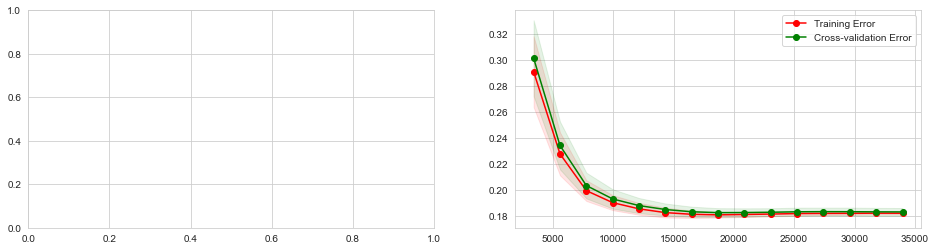

In [90]:
model = LogisticRegression()
model, Summary_LR = PrintResults(model, X_train, y_train, 'Logistic Regression')

y_train_LR = pd.Series(model.predict(X_train), name = "LR")
y_test_LR = pd.Series(model.predict(X_test), name = "LR")

### stochastic gradient descent (SGD) learning


Scoring Accuracy: 99.00 %
Scoring Mean: 99.02 %
Scoring Standard Deviation: 0.0663 %
Precision: 100.00 %
Recall: 98.42 %
f1-score: 99.20 %


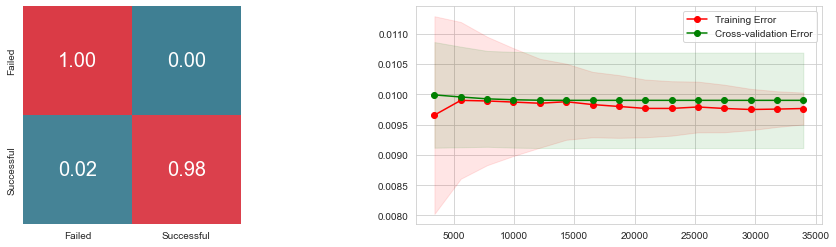

In [80]:
model = linear_model.SGDClassifier(max_iter = 200, tol = None)
model,Summary_SGD = PrintResults(model, X_train, y_train, 'SGD')
y_train_SGD = pd.Series(model.predict(X_train), name = "SGD")
y_test_SGD = pd.Series(model.predict(X_test), name = "SGD")

### Random Forest


Scoring Accuracy: 87.00 %
Scoring Mean: 99.13 %
Scoring Standard Deviation: 0.0773 %
Precision: 99.61 %
Recall: 99.16 %
f1-score: 99.39 %


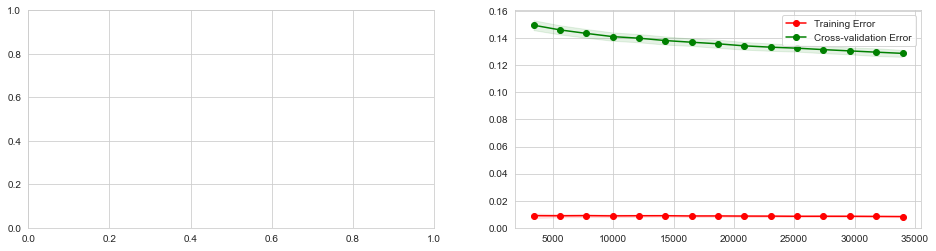

In [26]:
model = RandomForestClassifier(n_estimators = 10)
model,Summary_RF = PrintResults(model, X_train,y_train, 'Random Forest')
y_train_RF = pd.Series(model.predict(X_train), name = "RF")
y_test_RF = pd.Series(model.predict(X_test), name = "RF")

<BarContainer object of 33 artists>

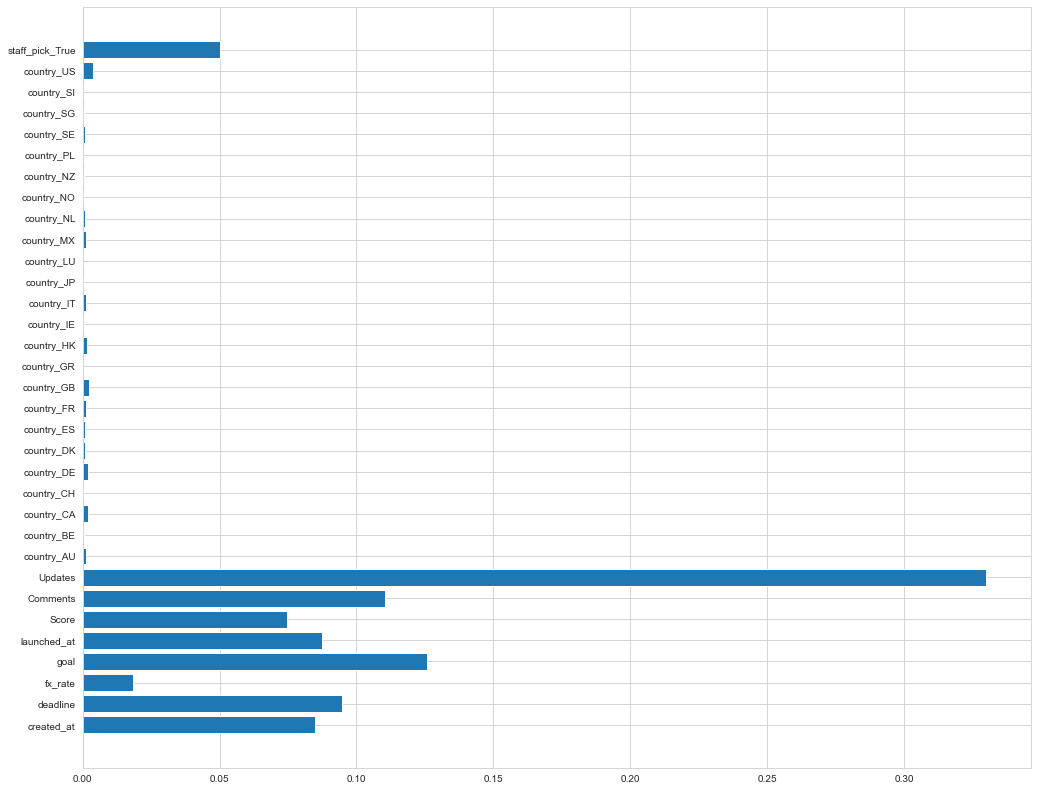

In [27]:
plt.figure(figsize = (17,14))
plt.barh(X_train.columns, model.feature_importances_)

### SVM

Scoring Accuracy: 99.00 %
Scoring Mean: 99.02 %
Scoring Standard Deviation: 0.0669 %
Precision: 100.00 %
Recall: 98.43 %
f1-score: 99.21 %


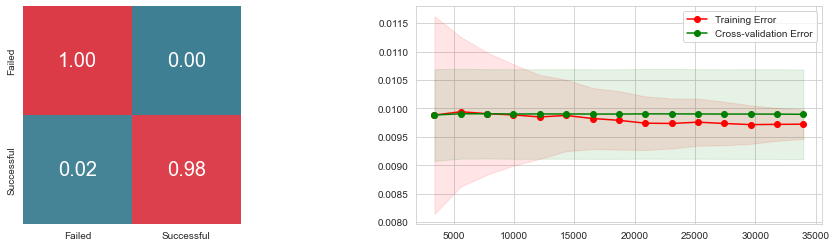

In [84]:

model = SVC()
model,Summary_SVM = PrintResults(model, X_train, y_train, 'SVM')
y_train_SVM = pd.Series(model.predict(X_train), name = "SVM")
y_test_SVM = pd.Series(model.predict(X_test), name = "SVM")

### KNN

In [21]:
model = KNeighborsClassifier(n_neighbors = 3)
model,Summary_KNN = PrintResults(model, X_train, y_train,'KNN')
y_train_KNN = pd.Series(model.predict(X_train), name = "KNN")
y_test_KNN = pd.Series(model.predict(X_test), name = "KNN")

KeyboardInterrupt: 

### Gaussian Naive Bayes

Scoring Accuracy: 99.00 %
Scoring Mean: 98.90 %
Scoring Standard Deviation: 0.0957 %
Precision: 99.45 %
Recall: 98.76 %
f1-score: 99.10 %


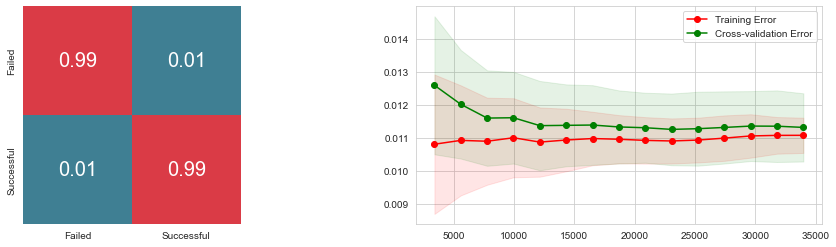

In [21]:
model = GaussianNB()
model,Summary_GNB = PrintResults(model, X_train, y_train, "GNB")
y_train_GNB = pd.Series(model.predict(X_train), name = "GNB")
y_test_GNB = pd.Series(model.predict(X_test), name = "GNB")

### Perceptron

C:\Users\acer\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\acer\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\acer\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\acer\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before converge

Scoring Accuracy: 99.00 %
Scoring Mean: 98.54 %
Scoring Standard Deviation: 1.5317 %
Precision: 99.30 %
Recall: 99.20 %
f1-score: 99.25 %


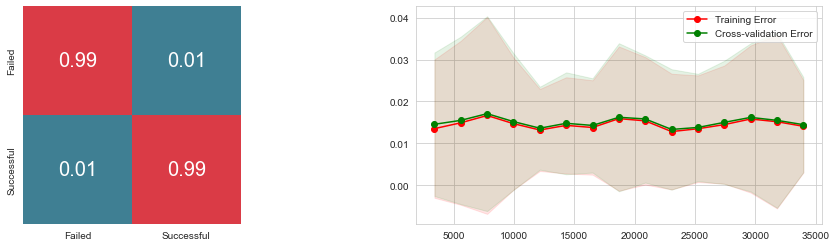

In [22]:
model = Perceptron(max_iter = 5)
model,Summary_MLP = PrintResults(model, X_train, y_train, 'MLP')
y_train_MLP = pd.Series(model.predict(X_train), name = "MLP")
y_test_MLP = pd.Series(model.predict(X_test), name = "MLP")

### AdaBoost Classifier

Scoring Accuracy: 99.00 %
Scoring Mean: 99.47 %
Scoring Standard Deviation: 0.0667 %
Precision: 99.57 %
Recall: 99.46 %
f1-score: 99.51 %


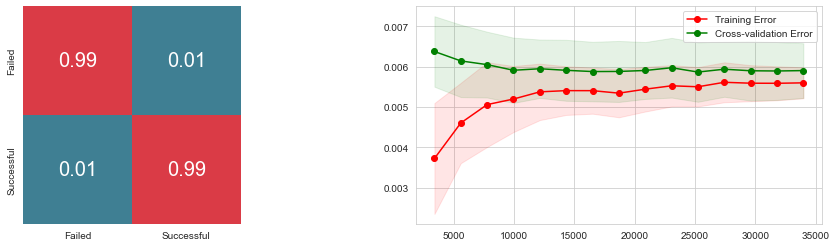

In [24]:
model = AdaBoostClassifier(n_estimators=10, random_state=0)
model,Summary_ADB = PrintResults(model, X_train, y_train, 'ADB')
y_train_ADB = pd.Series(model.predict(X_train), name = "ADB")
y_test_ADB = pd.Series(model.predict(X_test), name = "ADB")

### Gradient Boost Classifier

Scoring Accuracy: 99.00 %
Scoring Mean: 99.43 %
Scoring Standard Deviation: 0.0480 %
Precision: 99.60 %
Recall: 99.41 %
f1-score: 99.50 %


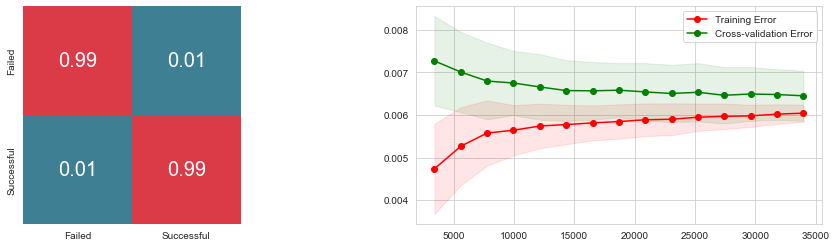

In [25]:
model = GradientBoostingClassifier(n_estimators=10, random_state=0)
model,Summary_GBC = PrintResults(model, X_train, y_train, 'GBC')
y_train_GBC = pd.Series(model.predict(X_train), name = "GBC")
y_test_GBC = pd.Series(model.predict(X_test), name = "GBC")

### XG Boost

Scoring Accuracy: 88.00 %
Scoring Mean: 93.79 %
Scoring Standard Deviation: 0.2286 %
Precision: 92.70 %
Recall: 93.03 %
f1-score: 92.87 %


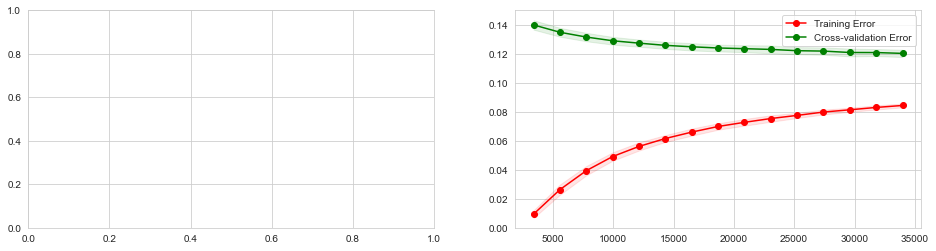

In [28]:
model = xgboost.XGBClassifier(use_label_encoder=False, eval_metric = 'mlogloss')
model,Summary_XGB = PrintResults(model, X_train, y_train, 'XGB')
y_train_XGB = pd.Series(model.predict(X_train), name = "XGB")
y_test_XGB = pd.Series(model.predict(X_test), name = "XGB")

In [29]:
df_temp = pd.read_csv('Final_All.csv')

C:\Users\acer\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (14,18,20,24,42,43,44) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [30]:
df_temp

,backers_count,blurb,category,converted_pledged_amount,country,country_displayable_name,created_at,creator,currency,currency_symbol,...,usd_pledged,usd_type,profit,class,Index,Urls,Text,Score,Comments,Updates
0,45,"Taking you inside and outside of prison, and a...","{""id"":357,""name"":""Audio"",""analytics_name"":""Aud...",4506,US,the United States,1577743896,"{""id"":1779519601,""name"":""Matthew and Spoon"",""s...",USD,$,...,4506.000000,international,6.00,1,0.0,https://www.kickstarter.com/projects/atnightif...,The Play_x000D_\nProject We Love_x000D_\nBrook...,10.47,0.0,9.0
1,21,A podcast of working at a tech company in the ...,"{""id"":357,""name"":""Audio"",""analytics_name"":""Aud...",322,US,the United States,1573666016,"{""id"":675629714,""name"":""SaaS Graveyard"",""slug""...",USD,$,...,322.000000,international,22.00,1,1.0,https://www.kickstarter.com/projects/saasgrave...,"The Play_x000D_\nSan Francisco, CA_x000D_\nAud...",14.33,0.0,3.0
2,146,A live morning radio show broadcasted online e...,"{""id"":357,""name"":""Audio"",""analytics_name"":""Aud...",5555,SE,Sweden,1574880653,"{""id"":424626217,""name"":""Fredrik Söderholm"",""sl...",SEK,kr,...,5466.118096,international,2099.59,1,2.0,https://www.kickstarter.com/projects/gottsnack...,"The Stockholm, Sweden_x000D_\nAudio_x000D_\nSE...",11.18,0.0,0.0
3,31,For Season 9 of the Clive Barker Podcast and n...,"{""id"":357,""name"":""Audio"",""analytics_name"":""Aud...",1566,US,the United States,1574060612,"{""id"":745869713,""name"":""Ryan Danhauser"",""slug""...",USD,$,...,1566.000000,international,1066.00,1,3.0,https://www.kickstarter.com/projects/barkercas...,"The Play_x000D_\nFairbanks, AK_x000D_\nAudio_x...",15.96,2.0,4.0
4,9,"A 16 page Zine filled with articles, reviews a...","{""id"":357,""name"":""Audio"",""analytics_name"":""Aud...",881,GB,the United Kingdom,1571141508,"{""id"":1520875105,""name"":""De Broize Custom Drum...",GBP,£,...,844.427355,international,411.00,1,4.0,https://www.kickstarter.com/projects/zine-issu...,"The Play_x000D_\nLondon, UK_x000D_\nAudio_x000...",12.8,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221242,0,Our mission is to start a Live Action Role Pla...,"{""id"":271,""name"":""Live Games"",""analytics_name""...",0,US,the United States,1475529797,"{""id"":2062548518,""name"":""Mary"",""is_registered""...",USD,$,...,0.000000,international,-2000.00,0,NaN,NaN,NaN,NaN,NaN,NaN
221243,4,A cat cafe in Hertfordshire. A place for rescu...,"{""id"":312,""name"":""Restaurants"",""analytics_name...",79,GB,the United Kingdom,1525799570,"{""id"":990556221,""name"":""Scarlett (deleted)"",""i...",GBP,£,...,81.168831,international,-9940.00,0,NaN,NaN,NaN,NaN,NaN,NaN
221244,5,"We are trying to turn our very small, catering...","{""id"":311,""name"":""Food Trucks"",""analytics_name...",47,US,the United States,1524776237,"{""id"":295284192,""name"":""Stacie Copeland"",""slug...",USD,$,...,47.000000,international,-4953.00,0,NaN,NaN,NaN,NaN,NaN,NaN
221245,0,¡Helado en forma de Rollitos! Algo exotico y d...,"{""id"":312,""name"":""Restaurants"",""analytics_name...",0,MX,Mexico,1498444541,"{""id"":1481777693,""name"":""Asael Zamora"",""is_reg...",MXN,$,...,0.000000,international,-350000.00,0,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
df_temp['category']

0         {"id":357,"name":"Audio","analytics_name":"Aud...
1         {"id":357,"name":"Audio","analytics_name":"Aud...
2         {"id":357,"name":"Audio","analytics_name":"Aud...
3         {"id":357,"name":"Audio","analytics_name":"Aud...
4         {"id":357,"name":"Audio","analytics_name":"Aud...
                                ...                        
221242    {"id":271,"name":"Live Games","analytics_name"...
221243    {"id":312,"name":"Restaurants","analytics_name...
221244    {"id":311,"name":"Food Trucks","analytics_name...
221245    {"id":312,"name":"Restaurants","analytics_name...
221246    {"id":34,"name":"Tabletop Games","analytics_na...
Name: category, Length: 221247, dtype: object

In [32]:
df_temp['urls']

0         {"web":{"project":"https://www.kickstarter.com...
1         {"web":{"project":"https://www.kickstarter.com...
2         {"web":{"project":"https://www.kickstarter.com...
3         {"web":{"project":"https://www.kickstarter.com...
4         {"web":{"project":"https://www.kickstarter.com...
                                ...                        
221242    {"web":{"project":"https://www.kickstarter.com...
221243    {"web":{"project":"https://www.kickstarter.com...
221244    {"web":{"project":"https://www.kickstarter.com...
221245    {"web":{"project":"https://www.kickstarter.com...
221246    {"web":{"project":"https://www.kickstarter.com...
Name: urls, Length: 221247, dtype: object

In [35]:
urls = []
for pos in range(df_temp.shape[0]):
    val = eval(df_temp['category'][pos])
    urls.append(val['name'])


In [45]:
urls_df = pd.DataFrame(urls)
urls_df.describe()

,0
count,221247
unique,161
top,Product Design
freq,5347


In [47]:
urls_df[urls_df[0] == 'Audio']

,0
0,Audio
1,Audio
2,Audio
3,Audio
4,Audio
...,...
220751,Audio
220927,Audio
221059,Audio
221070,Audio


In [65]:
df1 = df_temp[df_temp['spotlight']==True]
# df1[df1['class'] == 1]
df1

,backers_count,blurb,category,converted_pledged_amount,country,country_displayable_name,created_at,creator,currency,currency_symbol,...,usd_pledged,usd_type,profit,class,Index,Urls,Text,Score,Comments,Updates
0,45,"Taking you inside and outside of prison, and a...","{""id"":357,""name"":""Audio"",""analytics_name"":""Aud...",4506,US,the United States,1577743896,"{""id"":1779519601,""name"":""Matthew and Spoon"",""s...",USD,$,...,4506.000000,international,6.00,1,0.0,https://www.kickstarter.com/projects/atnightif...,The Play_x000D_\nProject We Love_x000D_\nBrook...,10.47,0.0,9.0
1,21,A podcast of working at a tech company in the ...,"{""id"":357,""name"":""Audio"",""analytics_name"":""Aud...",322,US,the United States,1573666016,"{""id"":675629714,""name"":""SaaS Graveyard"",""slug""...",USD,$,...,322.000000,international,22.00,1,1.0,https://www.kickstarter.com/projects/saasgrave...,"The Play_x000D_\nSan Francisco, CA_x000D_\nAud...",14.33,0.0,3.0
2,146,A live morning radio show broadcasted online e...,"{""id"":357,""name"":""Audio"",""analytics_name"":""Aud...",5555,SE,Sweden,1574880653,"{""id"":424626217,""name"":""Fredrik Söderholm"",""sl...",SEK,kr,...,5466.118096,international,2099.59,1,2.0,https://www.kickstarter.com/projects/gottsnack...,"The Stockholm, Sweden_x000D_\nAudio_x000D_\nSE...",11.18,0.0,0.0
3,31,For Season 9 of the Clive Barker Podcast and n...,"{""id"":357,""name"":""Audio"",""analytics_name"":""Aud...",1566,US,the United States,1574060612,"{""id"":745869713,""name"":""Ryan Danhauser"",""slug""...",USD,$,...,1566.000000,international,1066.00,1,3.0,https://www.kickstarter.com/projects/barkercas...,"The Play_x000D_\nFairbanks, AK_x000D_\nAudio_x...",15.96,2.0,4.0
4,9,"A 16 page Zine filled with articles, reviews a...","{""id"":357,""name"":""Audio"",""analytics_name"":""Aud...",881,GB,the United Kingdom,1571141508,"{""id"":1520875105,""name"":""De Broize Custom Drum...",GBP,£,...,844.427355,international,411.00,1,4.0,https://www.kickstarter.com/projects/zine-issu...,"The Play_x000D_\nLondon, UK_x000D_\nAudio_x000...",12.8,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221232,137,"A heavily branching visual novel, featuring lo...","{""id"":35,""name"":""Video Games"",""analytics_name""...",2944,US,the United States,1516313283,"{""id"":377353768,""name"":""Jaime Barnhill"",""slug""...",USD,$,...,2944.000000,international,444.00,1,NaN,NaN,NaN,NaN,NaN,NaN
221239,15,3d STL files for warhammer village,"{""id"":270,""name"":""Gaming Hardware"",""analytics_...",572,ES,Spain,1611938506,"{""id"":678492947,""name"":""Atisbo Studios"",""slug""...",EUR,€,...,573.767267,international,401.00,1,NaN,NaN,NaN,NaN,NaN,NaN
221240,873,A mystery adventure that merges puzzles with v...,"{""id"":35,""name"":""Video Games"",""analytics_name""...",12096,US,the United States,1558634542,"{""id"":1565951853,""name"":""Matthew M. White"",""sl...",USD,$,...,12096.420000,international,2096.42,1,NaN,NaN,NaN,NaN,NaN,NaN
221241,414,A rad oracle deck for all stitchers. Gain insi...,"{""id"":273,""name"":""Playing Cards"",""analytics_na...",28237,US,the United States,1611066509,"{""id"":1698906408,""name"":""Kayanna Nelson"",""slug...",USD,$,...,28237.000000,international,20237.00,1,NaN,NaN,NaN,NaN,NaN,NaN


In [60]:
df_temp['spotlight']

0          True
1          True
2          True
3          True
4          True
          ...  
221242    False
221243    False
221244    False
221245    False
221246     True
Name: spotlight, Length: 221247, dtype: bool